In [1]:
#https://samsclass.info/
#https://samsclass.info/127/127_S23.shtml
#https://www.youtube.com/watch?v=v9GycB7fZgE
!pip install git+https://github.com/pralab/secml

  Cloning https://github.com/pralab/secml to /tmp/pip-req-build-idbz7lz5
  Running command git clone --filter=blob:none --quiet https://github.com/pralab/secml /tmp/pip-req-build-idbz7lz5
  Resolved https://github.com/pralab/secml to commit 660540d86427ba583cf57b3f07846a2b9494afa0
  Preparing metadata (setup.py) ... done
  Created wheel for secml: filename=secml-0.15.6-py3-none-any.whl size=464025 sha256=b4c904d56e9e0d54a4254fcdc17dead5909bde7818694e9cd0c96922b609db82
  Stored in directory: /tmp/pip-ephem-wheel-cache-vv10rfvj/wheels/22/d7/97/6c54183f8e63358a946e938cc5ca912832afe4a0b9d9b3d736
Successfully built secml


In [2]:
import secml
from secml.data.loader import CDataLoaderMNIST
loader = CDataLoaderMNIST()

2024-11-10 07:02:35,337 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data
2024-11-10 07:02:35,337 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data


INFO:secml.settings:New `SECML_HOME_DIR` created: /root/secml-data


2024-11-10 07:02:35,349 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf
2024-11-10 07:02:35,349 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf


INFO:secml.settings:Default configuration file copied to: /root/secml-data/secml.conf


2024-11-10 07:02:35,358 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets
2024-11-10 07:02:35,358 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets


INFO:secml.settings:New `SECML_DS_DIR` created: /root/secml-data/datasets


2024-11-10 07:02:35,365 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models
2024-11-10 07:02:35,365 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models


INFO:secml.settings:New `SECML_MODELS_DIR` created: /root/secml-data/models


2024-11-10 07:02:35,372 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments
2024-11-10 07:02:35,372 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments


INFO:secml.settings:New `SECML_EXP_DIR` created: /root/secml-data/experiments


2024-11-10 07:02:35,377 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs
2024-11-10 07:02:35,377 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs


INFO:secml.settings:New `SECML_LOGS_DIR` created: /root/secml-data/logs


2024-11-10 07:02:35,384 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data
2024-11-10 07:02:35,384 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


INFO:secml.settings:New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data



File stored in `/root/secml-data/datasets/mnist/train-images-idx3-ubyte.gz`

File stored in `/root/secml-data/datasets/mnist/train-labels-idx1-ubyte.gz`

File stored in `/root/secml-data/datasets/mnist/t10k-images-idx3-ubyte.gz`

File stored in `/root/secml-data/datasets/mnist/t10k-labels-idx1-ubyte.gz`


In [3]:
random_state = 999
n_tr = 100 # number of training samples
n_val = 500 # number of validation set samples
n_ts = 500 # number of test set samples

digits = (5,9)

tr_val = loader.load('training', digits=digits, num_samples=n_tr + n_val)
ts = loader.load('testing', digits=digits, num_samples=n_ts)

#Split in Training and Validation Set
tr = tr_val[:n_tr, :]
val = tr_val[n_tr:, :]

#Normalize the Features in '[0,1]'
tr.X /= 255
val.X /= 255
ts.X /= 255

print("Training Set")
print(tr.X)
print(tr.X.shape)

print("Validation Set")
print(val.X)
print(val.X.shape)

print("Test Set")
print(ts.X)
print(ts.X.shape)


Training Set
CArray([[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]])
(100, 784)
Validation Set
CArray([[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]])
(500, 784)
Test Set
CArray([[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]])
(500, 784)


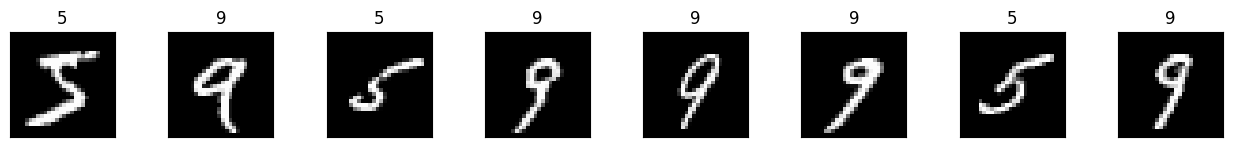

In [4]:
from secml.figure import CFigure
#only required for visualization in notebooks
%matplotlib inline
# Let's define a convenice function ti easily plot the MNIST Dataset
def show_digits_1(samples, labels, digs, n_display=8):
  samples = samples.atleast_2d()
  n_display = min(n_display, samples.shape[0])
  fig = CFigure(width=n_display*2, height=3)
  for idx in range(n_display):
    fig.subplot(2,n_display, idx+1)
    fig.sp.xticks([])
    fig.sp.yticks([])
    fig.sp.imshow(samples[idx, :].reshape((28,28)), cmap='gray')
    fig.sp.title("{}".format(digits[labels[idx].item()]))
  fig.show()
show_digits_1(tr.X, tr.Y, digits)

In [5]:
#TRAINING A CLASSIFIER
from secml.ml.classifiers import CClassifierSVM
#Traing SVM in the dual space, on a linear kernel , as needed for poisoning
clf = CClassifierSVM(C=10, kernel='linear')

print("Training of classifier...")
clf.fit(tr.X, tr.Y)
#Compute predictions on a test set
y_pred = clf.predict(ts.X)
#Metric to use for perfromance evaluation
from secml.ml.peval.metrics import CMetricAccuracy
metric= CMetricAccuracy()
#Evaluate the accuracy of the classifier
acc = metric.performance_score(y_true=ts.Y, y_pred=y_pred)

print("Accuracy on test set: {:.2%}".format(acc))

Training of classifier...
Accuracy on test set: 93.60%


In [6]:
#AN EVASION ATTACK THAT IS TO MODIFY SOME OF THE TEST IMAGES SO THAT THE MODEL WILL MAKE SOME ERRORS. WE WILL USE ONLY
#25 IMAGES
#FOR SIMPLICITY , LET'S ATTACK ON A SUBSET OF THE TEST SET
attack_ds = ts[:25, :]

noise_type = 'l2' # TYPE OF PERTUBATION 'l1' OR 'l2'
dmax = 2.5 #Maximum Perturbation
lb, ub = 0., 1. # Bounds of the attack space, Can be set to 'None' for unbound
y_target = None #None if 'error-generic' or a class label for 'error-specific'

#should be chosen depending on the optimization problem
solver_params = {
    'eta':0.5,
    'eta_min': 2.5,
    'eta_max': None,
    'max_iter':100,
    'eps': 1e-6
}

from secml.adv.attacks import CAttackEvasionPGDLS
pgd_ls_attack = CAttackEvasionPGDLS(classifier=clf,
                                    double_init_ds=tr,
                                    distance=noise_type,
                                    dmax=dmax,
                                    solver_params=solver_params,
                                    y_target=y_target)
print("Attack started...")
eva_y_pred, _, eva_adv_ds, _ = pgd_ls_attack.run(attack_ds.X, attack_ds.Y)
print("Attack complete!")

acc = metric.performance_score(
    y_true=attack_ds.Y, y_pred=clf.predict(attack_ds.X))
acc_attack = metric.performance_score(
        y_true=attack_ds.Y, y_pred=eva_y_pred)
print("Accuracy on reduced test set before attack: {:.2%}".format(acc))
print("Accuracy on reduced test set after attack: {:.2%}".format(acc_attack))


Attack started...
Attack complete!
Accuracy on reduced test set before attack: 100.00%
Accuracy on reduced test set after attack: 12.00%


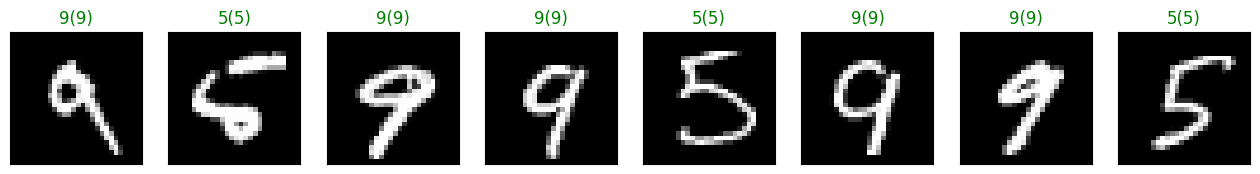

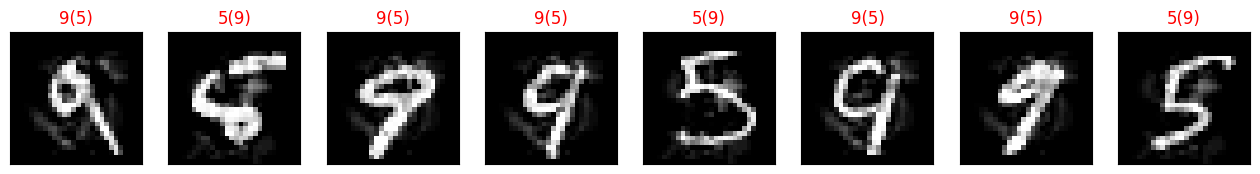

In [7]:
# VIEWING THE MODIFIED IMAGES RESULTS
# EXECUTE THESE COMMANDS TO SHOW EXAMPLES OF THE IMAGES BEFORE AND AFTER THE ATTACK

from secml.figure import CFigure
# Only required for Visualization in Notebooks
%matplotlib inline

# Let's define a convenience function to easily plot the MNIST Dataset
def show_digits(samples, preds, labels, digs, n_display=8):
    samples = samples.atleast_2d()
    n_display = min(n_display, samples.shape[0])
    fig = CFigure(width=16, height=6)  # Adjusted width and height for better visibility
    for idx in range(n_display):
        fig.subplot(2, 8, idx + 1)  # Create a grid of 2 rows and 8 columns
        fig.sp.xticks([])
        fig.sp.yticks([])
        fig.sp.imshow(samples[idx, :].reshape((28, 28)), cmap='gray')
        fig.sp.title("{}({})".format(digs[labels[idx].item()], digs[preds[idx].item()]),
                       color=("green" if labels[idx].item() == preds[idx].item() else "red"))
    fig.show()

# Displaying the original attack dataset images
show_digits(attack_ds.X, clf.predict(attack_ds.X), attack_ds.Y, digits)

# Displaying the adversarial examples images
show_digits(eva_adv_ds.X, clf.predict(eva_adv_ds.X), eva_adv_ds.Y, digits)
